# Indian Startup Funding Analysis

![](https://i.imgur.com/LMnjce2.jpg)

In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)


## Loading Data

In [47]:
df = pd.read_csv("startup_funding.csv")

## Exploring Data

In [48]:
#checking the head of the data
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [49]:
# checking the columns
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [50]:
#checking the shape of the data
print("Size of data", df.shape)

Size of data (3044, 10)


As it is shown above, there are 10 columns and 3044 rows in the data set

In [51]:
#getting a general info on data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


other than serial number other columns are object type which we need to address in our data cleaning

## Cleaning Data

In [52]:
# checking the number of null values in the dataset
null_values = df.isnull().sum().sort_values(ascending = False) 
null_values

Remarks              2625
Amount in USD         960
SubVertical           936
City  Location        180
Industry Vertical     171
Investors Name         24
InvestmentnType         4
Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
dtype: int64

In [53]:
null_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
null_percent

Remarks              86.235217
Amount in USD        31.537451
SubVertical          30.749014
City  Location        5.913272
Industry Vertical     5.617608
Investors Name        0.788436
InvestmentnType       0.131406
Sr No                 0.000000
Date dd/mm/yyyy       0.000000
Startup Name          0.000000
dtype: float64

In [54]:
# removing Remarks column, since it contains a lot of nulls

df = df.drop(['Remarks'], axis = 1)

#checking the column names after removing the Remarks Column 
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

the "Amount in USD" column is a numeric type but it showed an object in the above analysis. In order to make it usable we should chang it to a numeric value.

but before we can change the type since there are "unknown" and "undisclosed" values in this column we should first check their number and see if what we should do with them

In [56]:
df[(df['Amount in USD']=='undisclosed')]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
20,21,17/11/2019,Burger Singh,Food and Beverage,Indian Burger Brand,Gurgaon,RB Investments,Venture,undisclosed
89,90,06/05/2019,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,undisclosed
91,92,05/05/2019,StyleDotMe,E-commerce,Fashion and Shopping,Delhi,Indian Angel Network and other angel investors...,Bridge Round,undisclosed


In [57]:
df[(df['Amount in USD']=='unknown')]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
34,35,21/10/2019,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,unknown


In [59]:
df[(df['Amount in USD']=='Undisclosed')]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
58,59,19/08/2019,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,Undisclosed
112,113,01/02/2019,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,Undisclosed
139,140,22/11/2018,Skillbox,Social Network,Art,Gurugram,Individual investors,Seed Funding,Undisclosed




The number of non numerical value for Amount in USD attribute are 7 , so we can remove them.


In [62]:
df[df['Amount in USD'].isnull()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
144,145,01/10/2018,Northmist,Fashion,Mens Wear,Delhi,Prashant Jaiswal,Seed/ Angel Funding,NaN
155,156,04/09/2018,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,NaN
157,158,05/09/2018,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (A...,Chennai,KDDI\\xc2\\xa0,Private Equity,NaN
165,166,01/08/2018,HealthFin,Finance,Patient Financing Platform,Pune,"Axilor, Sprout Venture Partners and others",Seed/ Angel Funding,NaN
189,190,01/07/2018,Leena AI,Technology,HR Virtual Agent For Employees,Gurugram,Y Combinator,Seed/ Angel Funding,NaN
...,...,...,...,...,...,...,...,...,...
3027,3028,21/05/2015,Knit,NaN,NaN,NaN,"Rohit Jain, Amit Rambhia & Others",Seed Funding,NaN
3030,3031,22/01/2015,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,NaN
3031,3032,22/01/2015,Englishleap.com,NaN,NaN,NaN,ANALEC,Private Equity,NaN
3035,3036,24/01/2015,Impartus,NaN,NaN,NaN,Kaizen Private Equity,Private Equity,NaN


Although there are a big number of null values but since the purpose of this is to analyse the funding filling this amount of row with average or zero will give us a big bias so it is better to drop them

In [64]:
# drop rows with non numerical funding amount 
df.drop(df.loc[(df['Amount in USD']=='undisclosed') | 
                   (df['Amount in USD']=='Undisclosed') | 
                   (df['Amount in USD'].isnull()) | 
                   (df['Amount in USD']=='unknown')].index,inplace=True)

In [72]:
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

df["AmountInUSD"] = df["Amount in USD"].apply(lambda x: float(clean_amount(x)))
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,AmountInUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",1800000.0


In [73]:
df = df.drop(['Amount in USD'], axis = 1)

In [74]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,AmountInUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...,...
3038,3039,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,2500000.0
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0


date format should be separeted so it could be of more use

In [77]:
#checking data to so abnormalities
df["Date dd/mm/yyyy"].unique()

<bound method Series.unique of 0       09/01/2020
1       13/01/2020
2       09/01/2020
3       02/01/2020
4       02/01/2020
           ...    
3038    28/01/2015
3039    29/01/2015
3040    29/01/2015
3041    30/01/2015
3043    31/01/2015
Name: Date dd/mm/yyyy, Length: 2077, dtype: object>

In [86]:
#cleaning the date column to be able to change the format

df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].replace({
    '05/072018': '05/07/2018',
    '01/07/015': '01/07/2015',
    '22/01//2015': '22/01/2015',
    '\\\\xc2\\\\xa010/7/2015': '10/07/2015',
    '12/05.2015': '12/05/2015',
    '13/04.2015': '13/04/2015',
    '15/01.2015': '15/01/2015'})
#changing the format of date and splitting it to three columns
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'])
df['Year'] = df['Date dd/mm/yyyy'].apply(lambda x: x.year)
df['Month'] = df['Date dd/mm/yyyy'].apply(lambda x: x.month)
df['Day'] = df['Date dd/mm/yyyy'].apply(lambda x: x.day)
df = df.drop('Date dd/mm/yyyy', axis=1)


In [87]:
#checking to see if everything changed correctly
df.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,AmountInUSD,Year,Month,Day
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,9,1
1,2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020,1,13
2,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020,9,1
3,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020,2,1
4,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020,2,1


In [117]:
#checking data to so abnormalities
df["City  Location"].unique()

<bound method Series.unique of 0       Bengaluru
1         Gurgaon
2       Bengaluru
3       New Delhi
4          Mumbai
          ...    
3038          NaN
3039          NaN
3040          NaN
3041          NaN
3043          NaN
Name: City  Location, Length: 2077, dtype: object>

In [119]:

# lets clean the data for better analysis
df['City'] = df['City  Location'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

## Analyzing Data

#### Funding distribution throughout years

In [98]:

years_funding = df['Year'].value_counts().sort_values(ascending = False)
#print("Number of funding per month in decreasing order(Top 10)\n",temp)
#year_month = data['yearmonth'].value_counts()


In [99]:
years_funding

2015    658
2016    586
2017    456
2018    265
2019    105
2020      7
Name: Year, dtype: int64

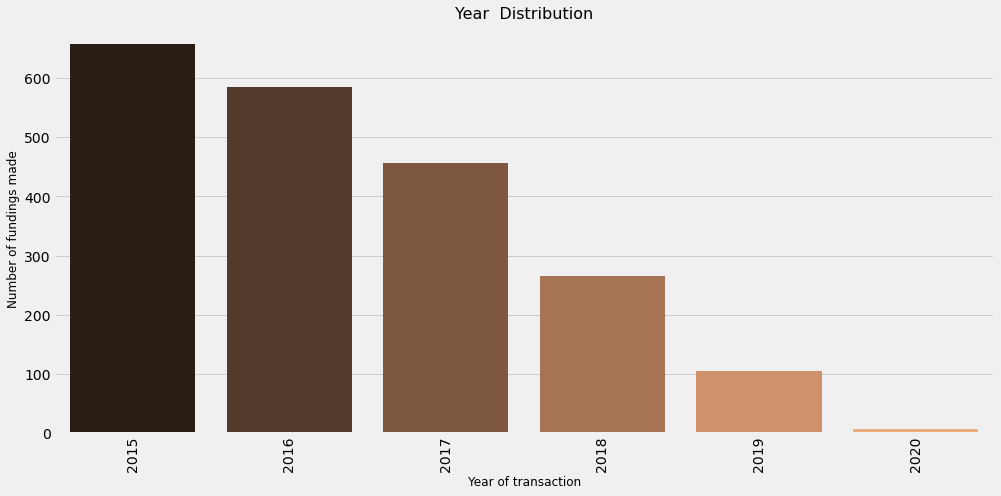

In [100]:

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(years_funding.index, years_funding.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year  Distribution", fontsize=16)
plt.show()

#### Highest, Lowest and the Average amoung of funding recieved

In [102]:
# lets check the Maximum funding of a startup
print("Maximum funding to a Startups is : ", df["AmountInUSD"].sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [107]:
# lets check the startups with the most funding
df[['AmountInUSD','Startup Name']].sort_values(by = 'AmountInUSD', ascending = False).head(10)

,AmountInUSD,Startup Name
60,3.900000e+09,Rapido Bike Taxi
651,2.500000e+09,Flipkart
2602,2.020000e+09,\\xc2\\xa0News in shorts
2608,2.019350e+09,\\xc2\\xa0Loylty Rewards
2603,2.016200e+09,\\xc2\\xa0Bluestone
2610,2.010000e+09,\\xc2\\xa0Mamagoto
83,1.510950e+09,Pratilipi
966,1.400000e+09,Flipkart
830,1.400000e+09,Paytm
31,1.000000e+09,Paytm


In [104]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", df["AmountInUSD"].sort_values().min())

Minimum funding to a Startups is :  20.0


In [106]:
# lets check the startups with least funding
df[['AmountInUSD','Startup Name']].sort_values(by = 'AmountInUSD', ascending = True).head(10)

,AmountInUSD,Startup Name
2613,20.0,Zenify
2605,20.0,\\xc2\\xa0Notesgen
2604,20.0,\\xc2\\xa0Shopsity
2611,20.0,\\xc2\\xa0Satvacart
3021,16000.0,CBS
3020,16000.0,Enabli
3019,16000.0,Yo Grad
3018,16000.0,Play your sport
3017,16000.0,Hostel Dunia
2938,16600.0,Leaf


In [109]:
# Average Funding
print("On Average indian startups got funding of : ", df["AmountInUSD"].sort_values().mean())

On Average indian startups got funding of :  23415997.812229175


#### Number of Fundings for each startup

Total startups funded :  1706
Swiggy           8
Ola Cabs         7
Nykaa            5
Flipkart         5
Paytm            5
Grofers          5
Capital Float    5
UrbanClap        5
Toppr            5
Medinfi          5
Rivigo           4
Udaan            4
Licious          4
Jugnoo           4
Icertis          4
Ola              4
BigBasket        4
Voonik           4
Magicpin         4
Aye Finance      4
Name: Startup Name, dtype: int64


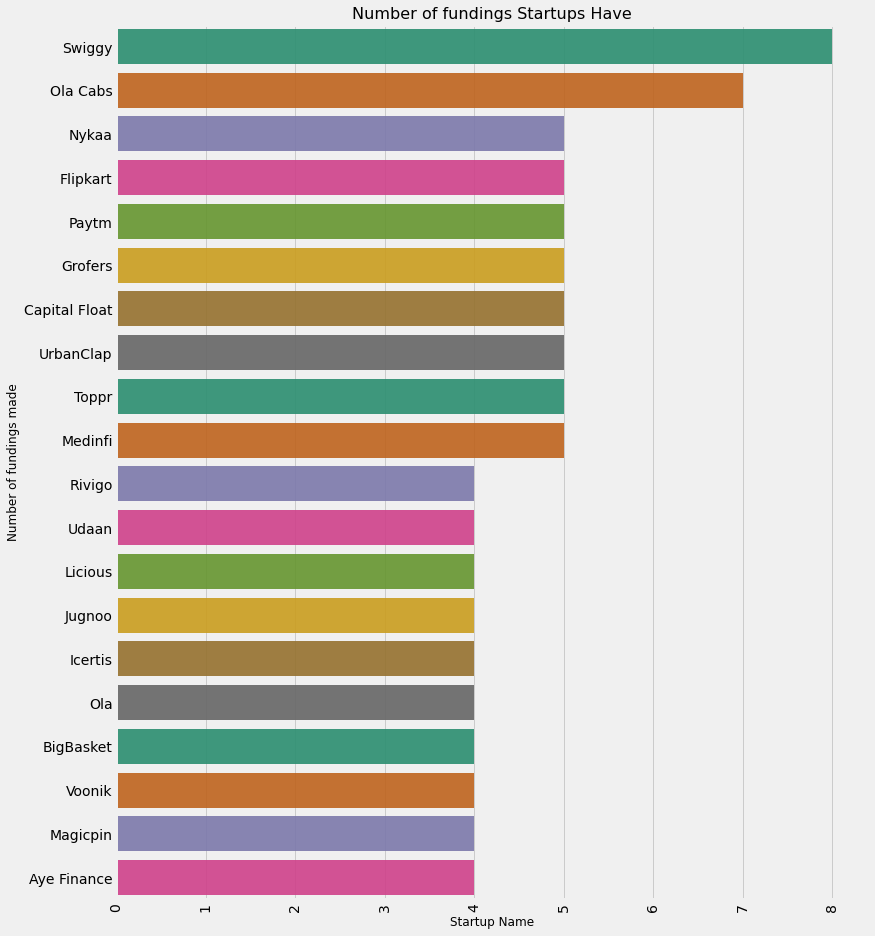

In [114]:

print("Total startups funded : ", len(df["Startup Name"].unique()))
print(df["Startup Name"].value_counts( ascending = False).head(20))
startupname = df['Startup Name'].value_counts().head(20)

# plotting the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

#### Locations with the highest number of startups

Bangalore    584
Mumbai       401
New Delhi    241
Gurgaon      198
Chennai       75
Hyderabad     72
Pune          71
Noida         55
Gurugram      43
Ahmedabad     27
Name: City, dtype: int64


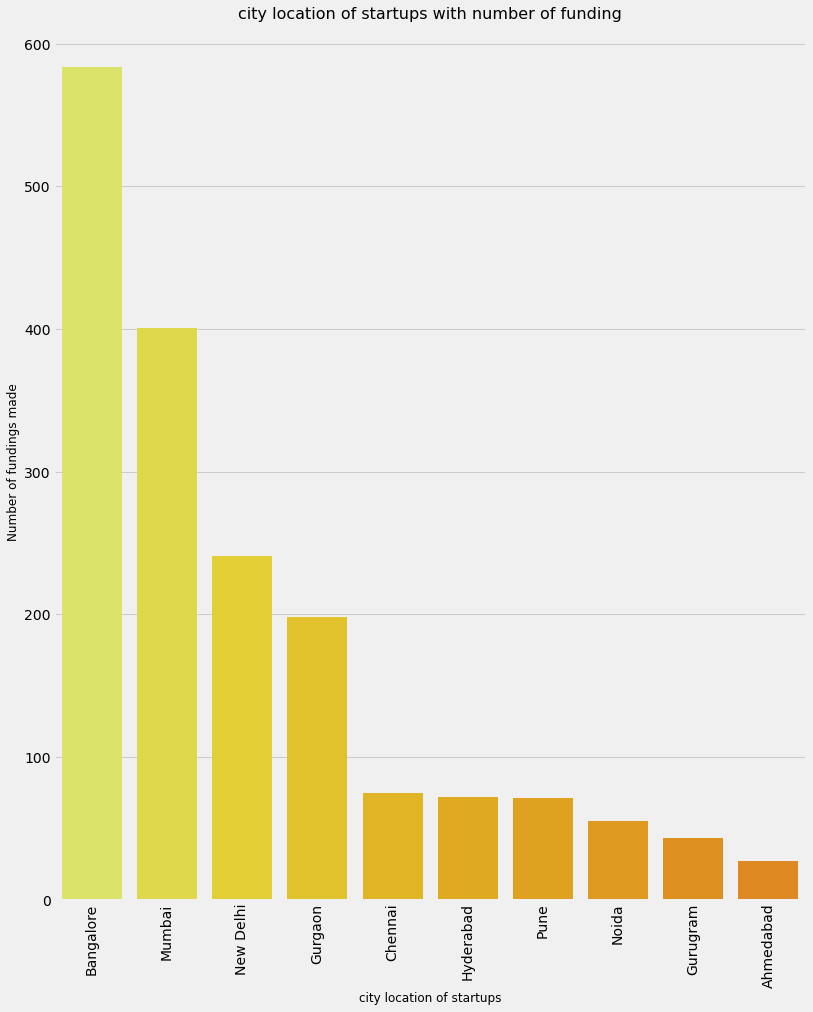

In [120]:


city = df['City'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()